In [12]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.stats as stats
from scipy.stats import kurtosis
from pyeeg import hjorth_mobility_complexity
import pandas as pd
from scipy.stats import skew

In [13]:


wav_file = "./Collection - 10.07.21 - Cleaned_Data/chili_construction-19.23.07.wav"
samplerate, data = wavfile.read(wav_file)
nyq = 0.5 *samplerate
low_cut = 0
high_cut = 20
low = low_cut/nyq
high = high_cut/nyq
b, a = signal.butter(20, 0.1, 'low')
length = int(len(data/ samplerate))
start = 0 
finish = samplerate
new_data = np.array([])
while start < len(data):
    data_new = data[start:finish]
    snippet_mean = np.mean(data_new)
    new_data = np.append(new_data, [snippet_mean])
    start = start + samplerate
    finish = finish + samplerate
transformed_data = new_data[0:len(new_data) - 1]
filteredData = signal.filtfilt(b, a, transformed_data) #data is the signal to be filtered
split_array = np.array_split(filteredData, 15)

wav_file2 = "./Collection - 10.07.21 - Cleaned_Data/chili_nosound-18.34.35.wav"
samplerate2, data2 = wavfile.read(wav_file2)
nyq = 0.5 *samplerate2
low_cut = 0
high_cut = 20
low = low_cut/nyq
high = high_cut/nyq
b, a = signal.butter(20, 0.1, 'low')
length2 = int(len(data2/ samplerate2))
start2 = 0 
finish2 = samplerate2
new_data2 = np.array([])
while start2 < len(data2):
    data_new2 = data2[start2:finish2]
    snippet_mean2 = np.mean(data_new2)
    new_data2 = np.append(new_data2, [snippet_mean2])
    start2 = start2 + samplerate2
    finish2 = finish2 + samplerate2
transformed_data2 = new_data2[0:len(new_data2) - 1]
filteredData2 = signal.filtfilt(b, a, transformed_data2) #data is the signal to be filtered
split_array2 = np.array_split(filteredData2, 15)

In [14]:
csv_file_decibel = "./Collection - 10.07.21 - Cleaned_Data/chili_construction-19.23.07_decibel.csv"
decibel_df = pd.read_csv(csv_file_decibel)
conv_arr= decibel_df.values
decibel = np.delete(conv_arr,[0],axis=1) 
decibel = decibel.ravel()
decibel_split_array = np.array_split(decibel, 15)

csv_file_decibel2 = "./Collection - 10.07.21 - Cleaned_Data/chili_construction-19.23.07_decibel.csv"
decibel_df2 = pd.read_csv(csv_file_decibel2)
conv_arr2= decibel_df2.values
decibel2 = np.delete(conv_arr2,[0],axis=1) 
decibel2 = decibel2.ravel()
decibel_split_array2 = np.array_split(decibel2, 15)

-34.104512998986166
-50.05244998463077
-18.4124923618942
-50.0780854521595
-32.40496302354798
-41.38320000810005
-33.26472256494866
-43.24560944634791
-44.04145565387004
-37.56100160154935
-33.02594346621808
-49.872525017952846
-30.80940373717555
-33.52334819625554
-47.06226310059677


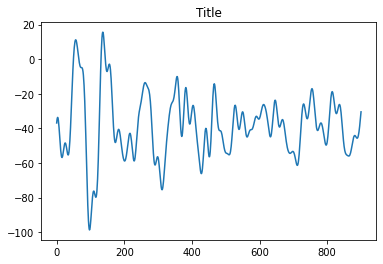

In [30]:
 i = 0
while i < len(split_array):
    mean_value = np.mean(split_array[i])
    print(mean_value)
    i = i + 1
    
plt.title("Title")
plt.plot(filteredData)


In [16]:
 i = 0
while i < len(split_array):
    kurtosis_value = kurtosis(split_array[i])
    print(kurtosis_value)
    i = i + 1

-0.6813235492893246
-1.6725237906969355
-1.1210275687211921
-1.3756271739667494
-1.2715727355208257
-1.4529091875484896
-0.5542013923558899
-0.9483362529724384
-1.071005857346299
-1.2429476835933946
-1.0836455460787415
-0.9708914542074654
-0.9546266736547588
-1.1509006588478088
-0.5364216872608645


[ 2  5  7 12 14 22 27 38 40 42 49 53 55]


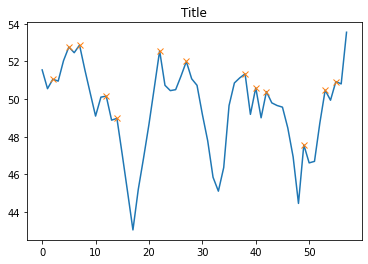

In [29]:
max = signal.argrelmax(split_array[2])
peaks, _= signal.find_peaks(decibel_split_array[7], height=0)
plt.plot(decibel_split_array[7])
plt.title("Title")
plt.plot(peaks, decibel_split_array[7][peaks], "x")

print(peaks)

In [18]:
 i = 0
while i < len(split_array):
    std_value = np.std(split_array[i])
    print(std_value)
    i = i + 1


23.47503489039749
37.93897830525165
23.200263030408745
6.453602032393666
17.184329871946055
22.119094255401276
9.617680884152762
15.566479401044734
9.251058150923694
4.282321425786629
6.310444378388102
8.28526254029358
7.376646115989714
9.478079848885766
7.138904255491493


In [19]:
 i = 0
while i < len(split_array):
    skew_value = skew(split_array[i])
    print(skew_value)
    i = i + 1

0.9301050201442176
0.24843149173921902
-0.34592948463220075
0.12161179938944
-0.5676643795728437
-0.17475992536469978
-0.18461423247049433
0.345345733720274
0.3931272344988476
-0.11884085464901994
-0.38150929110346415
0.5939719737304224
0.2500762683738932
-0.2520181337095858
0.5208173681863949


In [26]:
ttest = stats.ttest_ind(split_array[9],
                split_array2[9])

pearson = stats.pearsonr(split_array[9],
                split_array2[9])

hjorth_mobility_complexity.hjorth(split_array[4])

(0.017018107850480527, 58.34374525470427)

In [27]:
print(ttest)

Ttest_indResult(statistic=2.1370798902339194, pvalue=0.03465574573664584)


In [28]:
print(pearson)

(0.36245049288866504, 0.004428132451440224)
